In [2]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

# Import Data

In [3]:
#subs = generate_submissions(users=4, pbls=4)
subs = import_submissions(course_id = "C00198", dbname="test1")

In [4]:
mat = bianary_mat(subs)
#mat2 = succes_mat(subs)


# Linear evaluation

## Initialisation

In [5]:
LinDiff = pd.Series([1.0 for i in range(len(mat.index))], 
                    index=mat.index, name='Diff_Bin_0')
normalize(LinDiff)
LinAbil = pd.Series([1.0 for i in range(len(mat.columns))], 
                    index=mat.columns, name='Abil_Bin_0')
normalize(LinAbil)

dfAbl = pd.DataFrame(LinAbil)
dfDiff = pd.DataFrame(LinDiff)

## Evaluation (10 iterations)

In [6]:
cnt = 10
for i in range(1,1+cnt):
    LinDiff = process_bianary_mat(mat, LinAbil, 
                    name="%s%d" % (LinDiff.name[:-1],i))
    LinAbil = process_bianary_mat(mat, LinDiff, 
                    name="%s%d" % (LinAbil.name[:-1],i), Horiz=True)
    dfAbl[LinAbil.name] = LinAbil
    dfDiff[LinDiff.name] = LinDiff
#LinAbil

# SVD evaluation

In [7]:
npmat = mat.as_matrix()
U, s, V = np.linalg.svd(npmat, full_matrices=False)

In [8]:
U = pd.DataFrame(U, index=mat.index)
SvdDiff = pd.Series(U[0], index=mat.index, name="Diff_svd")
SvdDiff = SvdDiff.apply(abs)

In [9]:
SvdAbil = pd.Series(V[0], index=mat.columns, name="Abil_svd")
SvdAbil = SvdAbil.apply(abs)
#SvdAbil

# Comarison (Linear vs SVD)

In [10]:
Abilities = pd.DataFrame([SvdAbil, LinAbil]).T

In [11]:
# Abilities

In [12]:
#Abilities.plot.hist(stacked=True,bins=20)

In [13]:
# Abilities.plot.hist(stacked=False,bins=20, alpha=0.5)

<IPython.core.display.Javascript object>


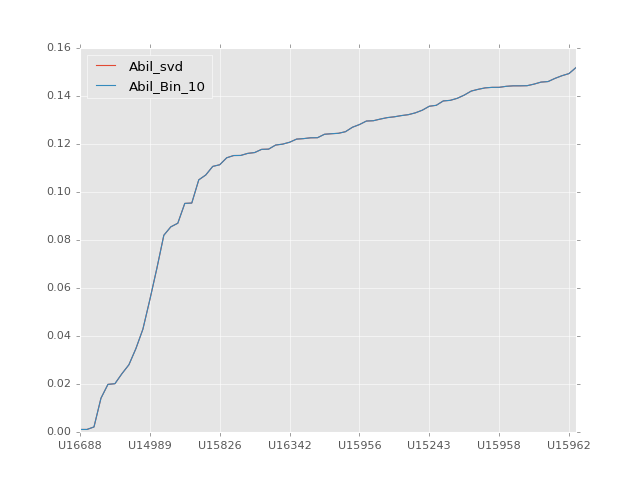

In [18]:
Abilities.sort_values(by="Abil_svd").plot()

In [15]:
Difficulties = pd.DataFrame([SvdDiff, LinDiff]).T

In [39]:
#Difficulties.plot.hist(stacked=True,bins=20)

In [40]:
#Difficulties.plot.hist(stacked=False,bins=20, alpha=0.5)

In [16]:
err = pd.Series([cmpVect(dfAbl["Abil_Bin_%d"%i], SvdAbil) for i in range(len(dfDiff.columns))])

<IPython.core.display.Javascript object>


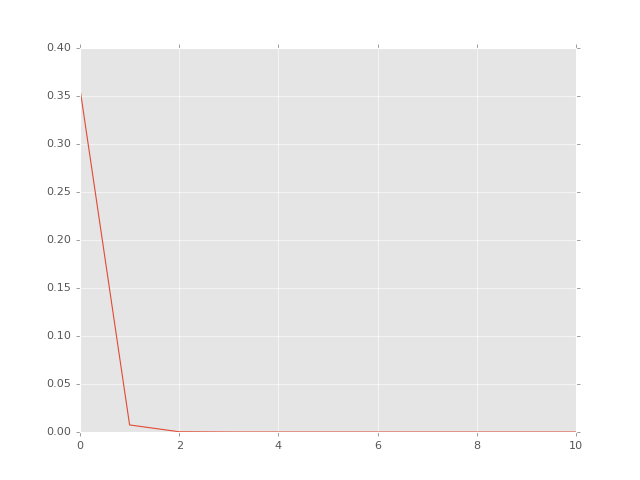

In [19]:
err.plot()